In [436]:
# Import dependencies
import pandas as pd
from sodapy import Socrata

# Load Data

In [437]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("chronicdata.cdc.gov", None)

In [438]:
# Return results as csv from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("swc5-untb", limit=2000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# View all columns in dataframes
pd.set_option('display.max_columns', None)  

# Display dataframe
results_df.head()

,year,stateabbr,statedesc,locationname,datasource,category,measure,data_value_unit,data_value_type,data_value,low_confidence_limit,high_confidence_limit,totalpopulation,locationid,categoryid,measureid,datavaluetypeid,short_question_text,geolocation,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8
0,2019,WY,Wyoming,Washakie,BRFSS,Health Outcomes,High cholesterol among adults aged >=18 years ...,%,Crude prevalence,32.1,31.2,33.1,7760,56043,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,"{'type': 'Point', 'coordinates': [-107.669052,...",14,3127
1,2020,WY,Wyoming,Laramie,BRFSS,Health Risk Behaviors,No leisure-time physical activity among adults...,%,Crude prevalence,23.8,21.5,26.2,100595,56021,RISKBEH,LPA,CrdPrv,Physical Inactivity,"{'type': 'Point', 'coordinates': [-104.660395,...",14,3119
2,2020,WY,Wyoming,Carbon,BRFSS,Health Status,Mental health not good for >=14 days among adu...,%,Crude prevalence,12.9,12.1,13.7,14711,56007,HLTHSTAT,MHLTH,CrdPrv,Mental Health,"{'type': 'Point', 'coordinates': [-106.9331526...",14,3081
3,2020,WY,Wyoming,Sublette,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,Crude prevalence,16.0,15.0,17.1,9856,56035,HLTHOUT,DEPRESSION,CrdPrv,Depression,"{'type': 'Point', 'coordinates': [-109.9161701...",14,3124
4,2020,WY,Wyoming,Uinta,BRFSS,Health Outcomes,Stroke among adults aged >=18 years,%,Crude prevalence,3.0,2.7,3.4,20215,56041,HLTHOUT,STROKE,CrdPrv,Stroke,"{'type': 'Point', 'coordinates': [-110.5589468...",14,893


# General Data Overview

In [439]:
# View how many years worth of data we have
results_df['year'].unique()

array(['2019', '2020'], dtype=object)

In [440]:
# View null values by year
results_df.isnull().sum()

year                              0
stateabbr                         0
statedesc                         0
locationname                     60
datasource                        0
category                          0
measure                           0
data_value_unit                   0
data_value_type                   0
data_value                        0
low_confidence_limit              0
high_confidence_limit             0
totalpopulation                   0
locationid                        0
categoryid                        0
measureid                         0
datavaluetypeid                   0
short_question_text               0
geolocation                      60
:@computed_region_bxsw_vy29    1192
:@computed_region_he4y_prf8     660
dtype: int64

In [441]:
# Check data types for results_df
results_df.dtypes

year                           object
stateabbr                      object
statedesc                      object
locationname                   object
datasource                     object
category                       object
measure                        object
data_value_unit                object
data_value_type                object
data_value                     object
low_confidence_limit           object
high_confidence_limit          object
totalpopulation                object
locationid                     object
categoryid                     object
measureid                      object
datavaluetypeid                object
short_question_text            object
geolocation                    object
:@computed_region_bxsw_vy29    object
:@computed_region_he4y_prf8    object
dtype: object

In [442]:
# View health categories - (which include metrics we could use as features for machine learning)
results_df['category'].unique()

array(['Health Outcomes', 'Health Risk Behaviors', 'Health Status',
       'Prevention'], dtype=object)

In [443]:
# View contributing health metrics (possible features for machine learning)
results_df.loc[results_df['category'].isin(['Prevention', 'Health Risk Behaviors', 'Health Status'])]['measureid'].unique()

array(['LPA', 'MHLTH', 'DENTAL', 'BINGE', 'COREW', 'CERVICAL', 'PHLTH',
       'BPMED', 'COLON_SCREEN', 'CHOLSCREEN', 'COREM', 'SLEEP',
       'CSMOKING', 'MAMMOUSE', 'ACCESS2', 'GHLTH', 'CHECKUP'],
      dtype=object)

In [444]:
# View disease outcomes (possible targets for machine learning)
# This analysis will focus on COPD (Chronic Obstructive Pulmonary Disease)
# However, this notebook will make it easy to analyze other diseases
results_df['measureid'].unique()

array(['HIGHCHOL', 'LPA', 'MHLTH', 'DEPRESSION', 'STROKE', 'CASTHMA',
       'BPHIGH', 'DIABETES', 'DENTAL', 'BINGE', 'COPD', 'COREW',
       'CERVICAL', 'CHD', 'PHLTH', 'BPMED', 'COLON_SCREEN', 'KIDNEY',
       'CHOLSCREEN', 'COREM', 'SLEEP', 'CSMOKING', 'MAMMOUSE',
       'ARTHRITIS', 'ACCESS2', 'TEETHLOST', 'CANCER', 'GHLTH', 'CHECKUP',
       'OBESITY'], dtype=object)

# Prepare Dataframe

In [445]:
# Create a list of columns from results_df we want to convert from object to numeric
# This will allow us to perform calculations on the data
numeric_list = ['year', 'data_value', 'low_confidence_limit', 'high_confidence_limit', 'totalpopulation']

# Convert columns in numeric_list to numeric data type in results_df
results_df[numeric_list] = results_df[numeric_list].apply(pd.to_numeric, errors='coerce')

# View data types for results_df
results_df.dtypes

year                             int64
stateabbr                       object
statedesc                       object
locationname                    object
datasource                      object
category                        object
measure                         object
data_value_unit                 object
data_value_type                 object
data_value                     float64
low_confidence_limit           float64
high_confidence_limit          float64
totalpopulation                  int64
locationid                      object
categoryid                      object
measureid                       object
datavaluetypeid                 object
short_question_text             object
geolocation                     object
:@computed_region_bxsw_vy29     object
:@computed_region_he4y_prf8     object
dtype: object

In [446]:
# Create a list of the health metrics which will become our features and make them into dataframes
# And print the feature and the measure of each dataframe as a key to more easily understand the data

# Add the health outcomes to a list
features_list = results_df.loc[results_df['category'].isin(['Prevention', 'Health Risk Behaviors', 'Health Status'])]['measureid'].unique()

# Create unique dataframes for each feature in the features_list
for feature in features_list:
    globals()[feature + "_df"] = results_df.loc[results_df['measureid'] == feature]

# Create a list that contains the names of the dataframes made in the step above
dataframes_list = [feature + "_df" for feature in features_list]

# Print the feature and the measure of each dataframe
for dataframe in dataframes_list:
    print(f"{dataframe} - {globals()[dataframe]['measure'].unique()}")

LPA_df - ['No leisure-time physical activity among adults aged >=18 years']
MHLTH_df - ['Mental health not good for >=14 days among adults aged >=18 years']
DENTAL_df - ['Visits to dentist or dental clinic among adults aged >=18 years']
BINGE_df - ['Binge drinking among adults aged >=18 years']
COREW_df - ['Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years']
CERVICAL_df - ['Cervical cancer screening among adult women aged 21-65 years']
PHLTH_df - ['Physical health not good for >=14 days among adults aged >=18 years']
BPMED_df - ['Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure']
COLON_SCREEN_df - ['Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years']
CHOLSCREEN_df - ['Cholesterol screening among adults aged >=18 years']
COREM_df - ['Older adult men aged >=65 ye

In [447]:
# Create the COPD dataframe by filtering results_df which will be our taget
COPD_df = results_df.loc[results_df["measureid"] == "COPD", :]

# Display dataframe and view all columns
COPD_df.head(3)

,year,stateabbr,statedesc,locationname,datasource,category,measure,data_value_unit,data_value_type,data_value,low_confidence_limit,high_confidence_limit,totalpopulation,locationid,categoryid,measureid,datavaluetypeid,short_question_text,geolocation,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8
12,2020,WY,Wyoming,Niobrara,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,8.4,7.3,9.5,2275,56027,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-104.4683727...",14,3121
21,2020,WY,Wyoming,Laramie,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Crude prevalence,6.3,5.5,7.3,100595,56021,HLTHOUT,COPD,CrdPrv,COPD,"{'type': 'Point', 'coordinates': [-104.660395,...",14,3119
38,2020,WY,Wyoming,Sheridan,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,5.7,4.9,6.6,30863,56033,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-106.8812114...",14,3123


In [448]:
# View dataframes list
dataframes_list

['LPA_df',
 'MHLTH_df',
 'DENTAL_df',
 'BINGE_df',
 'COREW_df',
 'CERVICAL_df',
 'PHLTH_df',
 'BPMED_df',
 'COLON_SCREEN_df',
 'CHOLSCREEN_df',
 'COREM_df',
 'SLEEP_df',
 'CSMOKING_df',
 'MAMMOUSE_df',
 'ACCESS2_df',
 'GHLTH_df',
 'CHECKUP_df']

In [449]:
# Add COPD_df to dataframes_list
dataframes_list.append("COPD_df")

# Filter dataframes to only include datavaluetypeid AgeAdjPrv
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].loc[globals()[dataframe]['datavaluetypeid'] == 'AgeAdjPrv']

# Change the name of data_value to the name of the measureid + data_value for all dataframes
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].rename(columns={'data_value': globals()[dataframe]['measureid'].unique()[0] + '_data_value'})

# Save a copy of each dataframe as dataframe_name + _copy
for dataframe in dataframes_list:
    globals()[dataframe + "_copy"] = globals()[dataframe].copy()

# Drop unnecessary columns for all dataframes in dataframes_list
for dataframe in dataframes_list:
    globals()[dataframe] = globals()[dataframe].drop(columns=['statedesc', 'datasource', 'category', 'measure', 
                                                              'data_value_unit', 'locationid', 'categoryid', 
                                                              'measureid', 'data_value_type', 'low_confidence_limit', 
                                                              'high_confidence_limit', 'short_question_text', 'geolocation', 
                                                              'datavaluetypeid', ':@computed_region_bxsw_vy29', 
                                                              ':@computed_region_he4y_prf8'], axis=1)

# Display dataframe and view all columns
COPD_df.head(3)

,year,stateabbr,locationname,COPD_data_value,totalpopulation
12,2020,WY,Niobrara,8.4,2275
38,2020,WY,Sheridan,5.7,30863
39,2020,WY,Hot Springs,6.8,4425


In [450]:
# View dataframes list
dataframes_list

['LPA_df',
 'MHLTH_df',
 'DENTAL_df',
 'BINGE_df',
 'COREW_df',
 'CERVICAL_df',
 'PHLTH_df',
 'BPMED_df',
 'COLON_SCREEN_df',
 'CHOLSCREEN_df',
 'COREM_df',
 'SLEEP_df',
 'CSMOKING_df',
 'MAMMOUSE_df',
 'ACCESS2_df',
 'GHLTH_df',
 'CHECKUP_df',
 'COPD_df']

In [451]:
# Copy the COPD_df dataframe to a new dataframe
ml_df = COPD_df.copy()

# Merge the dataframes in dataframes_list to ml_df
for dataframe in dataframes_list:
    ml_df = ml_df.merge(globals()[dataframe], how='left', on=['year', 'totalpopulation', 'stateabbr', 'locationname'])

# Rename the column COPD_data_value_x to COPD_data_value
ml_df = ml_df.rename(columns={'COPD_data_value_x': 'COPD_data_value'})

# Drop the column COPD_data_value_y
ml_df = ml_df.drop(columns=['COPD_data_value_y'], axis=1)

# Display dataframe and view all columns
ml_df.head(3)




,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,BPMED_data_value,COLON_SCREEN_data_value,CHOLSCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
0,2020,WY,Niobrara,8.4,2275,28.2,16.0,58.0,16.2,26.7,78.2,11.6,NaN,57.9,NaN,38.4,33.1,22.6,59.4,17.5,15.6,67.9
1,2020,WY,Sheridan,5.7,30863,20.4,13.3,65.3,19.3,32.3,81.9,8.4,NaN,63.4,NaN,50.0,31.9,17.6,69.2,14.7,10.8,64.0
2,2020,WY,Hot Springs,6.8,4425,24.6,14.1,61.8,17.8,28.8,80.7,9.7,NaN,61.5,NaN,41.4,32.3,19.9,60.1,16.2,12.9,62.4


In [452]:
# Get summary statistics for all columns
ml_df.describe()

,year,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,BPMED_data_value,COLON_SCREEN_data_value,CHOLSCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
count,3144.0,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,0.0,3144.000000,0.0,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,2020.0,7.183938,2.102205e+05,25.709796,15.730184,58.988963,17.834669,36.866349,81.565331,10.963836,NaN,67.734765,NaN,42.759351,34.471947,20.034256,70.444593,16.797328,16.032029,72.762309
std,0.0,1.747671,5.918720e+06,5.192709,2.040912,7.488897,3.020080,4.477454,2.344340,2.152859,NaN,4.738214,NaN,5.143715,3.637180,4.105682,3.959298,6.606075,4.442595,4.045601
min,2020.0,2.600000,8.700000e+01,10.200000,8.300000,33.200000,8.200000,16.200000,68.400000,5.600000,NaN,49.000000,NaN,19.800000,23.800000,5.800000,50.600000,5.700000,6.500000,58.300000
25%,2020.0,5.900000,1.088425e+04,22.000000,14.300000,53.600000,15.700000,33.900000,80.100000,9.300000,NaN,64.800000,NaN,39.300000,31.900000,17.500000,67.900000,12.100000,12.600000,69.800000
50%,2020.0,7.000000,2.562050e+04,25.200000,15.700000,59.800000,17.600000,36.800000,81.800000,10.800000,NaN,68.100000,NaN,42.700000,34.400000,19.850000,70.700000,15.000000,15.300000,73.200000
75%,2020.0,8.200000,6.829725e+04,29.200000,17.200000,64.525000,19.700000,39.800000,83.200000,12.400000,NaN,71.300000,NaN,46.000000,36.800000,22.600000,73.300000,19.500000,19.000000,75.600000
max,2020.0,16.500000,3.314493e+08,47.200000,23.300000,80.700000,27.600000,53.400000,87.700000,20.900000,NaN,82.100000,NaN,60.600000,48.400000,41.100000,83.400000,53.300000,36.800000,82.600000


# Machine Learning - RandomForestRegression

In [453]:
# Import dependencies for machine learning
# import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [454]:
# View ml_df
ml_df.head(3)

,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,BPMED_data_value,COLON_SCREEN_data_value,CHOLSCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
0,2020,WY,Niobrara,8.4,2275,28.2,16.0,58.0,16.2,26.7,78.2,11.6,NaN,57.9,NaN,38.4,33.1,22.6,59.4,17.5,15.6,67.9
1,2020,WY,Sheridan,5.7,30863,20.4,13.3,65.3,19.3,32.3,81.9,8.4,NaN,63.4,NaN,50.0,31.9,17.6,69.2,14.7,10.8,64.0
2,2020,WY,Hot Springs,6.8,4425,24.6,14.1,61.8,17.8,28.8,80.7,9.7,NaN,61.5,NaN,41.4,32.3,19.9,60.1,16.2,12.9,62.4


In [455]:
# Check for null values
ml_df.isnull().sum()

year                          0
stateabbr                     0
locationname                  1
COPD_data_value               0
totalpopulation               0
LPA_data_value                0
MHLTH_data_value              0
DENTAL_data_value             0
BINGE_data_value              0
COREW_data_value              0
CERVICAL_data_value           0
PHLTH_data_value              0
BPMED_data_value           3144
COLON_SCREEN_data_value       0
CHOLSCREEN_data_value      3144
COREM_data_value              0
SLEEP_data_value              0
CSMOKING_data_value           0
MAMMOUSE_data_value           0
ACCESS2_data_value            0
GHLTH_data_value              0
CHECKUP_data_value            0
dtype: int64

In [456]:
# Drop BPMED_data_value and CHOLSCREEN_data_value columns
ml_df = ml_df.drop(columns=['BPMED_data_value', 'CHOLSCREEN_data_value'], axis=1)

In [457]:
# View the null value in the locationname column
ml_df.loc[ml_df['locationname'].isnull()]

,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,COLON_SCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
365,2020,US,NaN,5.6,331449281,22.9,13.9,64.5,16.7,37.4,83.7,9.4,70.6,44.0,33.3,14.6,77.8,13.5,13.7,73.0


In [458]:
# Drop the null value in the locationname column
ml_df = ml_df.dropna()

# Check for null values
ml_df.isnull().sum()

year                       0
stateabbr                  0
locationname               0
COPD_data_value            0
totalpopulation            0
LPA_data_value             0
MHLTH_data_value           0
DENTAL_data_value          0
BINGE_data_value           0
COREW_data_value           0
CERVICAL_data_value        0
PHLTH_data_value           0
COLON_SCREEN_data_value    0
COREM_data_value           0
SLEEP_data_value           0
CSMOKING_data_value        0
MAMMOUSE_data_value        0
ACCESS2_data_value         0
GHLTH_data_value           0
CHECKUP_data_value         0
dtype: int64

In [459]:
# Create label encoder instance
le = LabelEncoder()

# Create a copy of ml_df
ml_df_encoded = ml_df.copy()

# Generate our categorical variable lists
dataset_cat = ml_df_encoded.dtypes[ml_df_encoded.dtypes == "object"].index.tolist()

# View the list of categorical variables
dataset_cat

['stateabbr', 'locationname']

In [460]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    ml_df_encoded[textColumn] = le.fit_transform(ml_df_encoded[textColumn])

# View ml_df
ml_df_encoded.head(3)

,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,COLON_SCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
0,2020,50,1179,8.4,2275,28.2,16.0,58.0,16.2,26.7,78.2,11.6,57.9,38.4,33.1,22.6,59.4,17.5,15.6,67.9
1,2020,50,1509,5.7,30863,20.4,13.3,65.3,19.3,32.3,81.9,8.4,63.4,50.0,31.9,17.6,69.2,14.7,10.8,64.0
2,2020,50,779,6.8,4425,24.6,14.1,61.8,17.8,28.8,80.7,9.7,61.5,41.4,32.3,19.9,60.1,16.2,12.9,62.4


In [461]:
# Create list of columns to be our features
feature_cols = [i for i in ml_df_encoded.columns if i not in ('COPD_data_value')]
X = ml_df_encoded[feature_cols]

# Create our target column
y = ml_df_encoded['COPD_data_value']

In [462]:
# Split the data into testing and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [463]:
# Train the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [464]:
# View feature importance
regressor.feature_importances_

array([0.        , 0.00476101, 0.00125623, 0.00128928, 0.00257245,
       0.05371611, 0.00282396, 0.00642451, 0.00152489, 0.00305553,
       0.13303906, 0.00336004, 0.00145186, 0.00232682, 0.76306983,
       0.00189207, 0.0040931 , 0.00688048, 0.0064628 ])

In [465]:
# Create a dataframe of the feature importance
feature_importance_df = pd.DataFrame(regressor.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# View the dataframe
feature_importance_df

,importance
CSMOKING_data_value,0.763070
PHLTH_data_value,0.133039
MHLTH_data_value,0.053716
GHLTH_data_value,0.006880
CHECKUP_data_value,0.006463
BINGE_data_value,0.006425
stateabbr,0.004761
ACCESS2_data_value,0.004093
COLON_SCREEN_data_value,0.003360
CERVICAL_data_value,0.003056


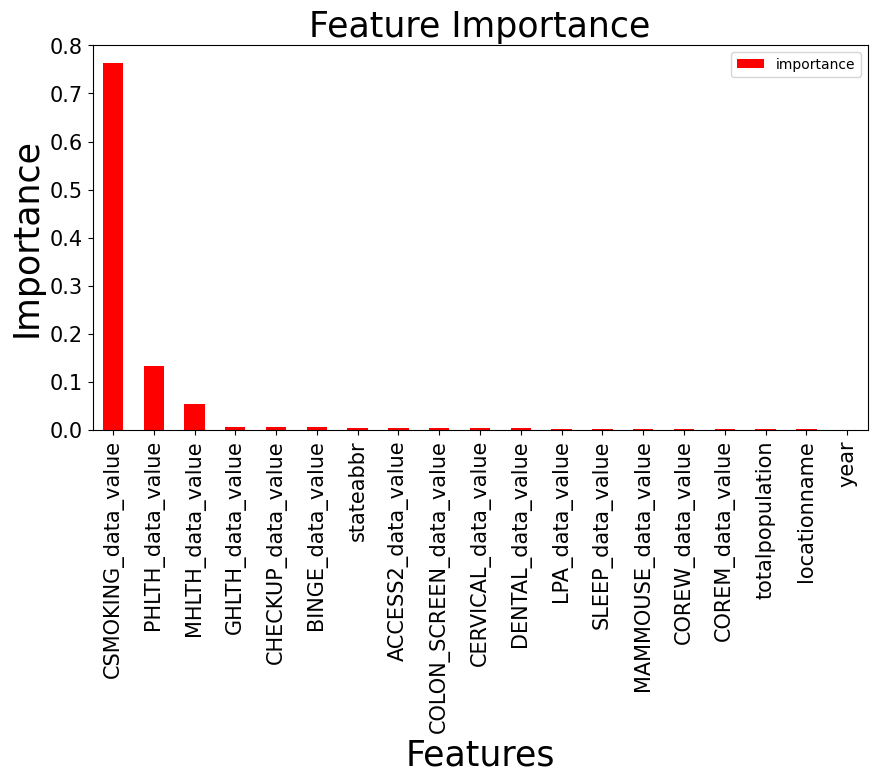

<Figure size 640x480 with 0 Axes>

In [466]:
# Import dependencies
import matplotlib.pyplot as plt
from pandas.plotting import table

# Create a bargraph of the feature importance
feature_importance_df.plot(kind='bar', figsize=(10,5), color='red', fontsize=15)
plt.title('Feature Importance', fontsize=25)
plt.xlabel('Features', fontsize=25)
plt.ylabel('Importance', fontsize=25)
plt.show()

plt.savefig('./Images/feature_importance.png')

In [467]:
# Predict the results
y_pred = regressor.predict(X_test)

In [468]:
# Evaluate the model
import numpy as np
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate the model
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.29850208050111154
r2 score:  0.9678719254226114


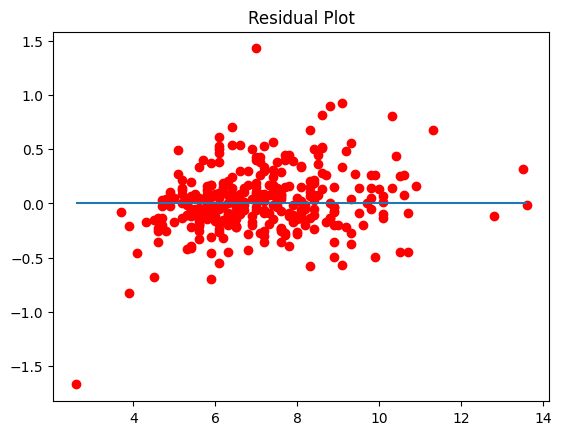

In [469]:
# Plot residuals
plt.scatter(y_test, y_test - y_pred, c="red", label="Testing Data")
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [470]:
# # Import dependencies
# import dataframe_image as dfi

# Create a dataframe of the actual and predicted values
actual_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# View the dataframe
actual_predicted_df.head(10)

# # View the dataframe
# ap_df = actual_predicted_df.head(10)

# # Export the dataframe as a png
# dfi.export(ap_df, './Images/dataframe.png')

,Actual,Predicted
2997,8.4,8.37
423,5.6,5.74
644,9.5,9.36
2481,6.9,6.86
1056,7.8,7.35
588,4.3,4.47
1633,7.4,7.23
962,7.8,7.89
2720,9.5,9.59
1050,9.1,8.76


In [471]:
# View summary statistics for the predicted results
print(pd.DataFrame(y_pred).describe())

                0
count  315.000000
mean     7.139302
std      1.627300
min      3.780000
25%      5.895000
50%      6.910000
75%      8.155000
max     13.610000


In [472]:
# View summary statistics for the actual results
print(pd.DataFrame(y_test).describe())

       COPD_data_value
count       315.000000
mean          7.160000
std           1.667998
min           2.600000
25%           5.950000
50%           7.000000
75%           8.200000
max          13.600000


# Machine Learning - Linear Regression

In [473]:
# Train a linear regression model using the training sets
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Create a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [474]:
# Predict the results
y_pred = regressor.predict(X_test)

In [475]:
# Evaluate the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate the model
print('r2 score: ', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.3384720262847948
r2 score:  0.9586918698125257


In [476]:
# Get the feature importance
feature_importance = regressor.coef_

# Create a dataframe of the feature importance
feature_importance_df = pd.DataFrame(feature_importance, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# View the dataframe
feature_importance_df

,importance
PHLTH_data_value,2.816506e-01
MHLTH_data_value,2.027922e-01
CSMOKING_data_value,1.720454e-01
CHECKUP_data_value,2.466950e-02
COREM_data_value,1.368507e-02
COREW_data_value,8.928655e-03
SLEEP_data_value,8.226542e-03
LPA_data_value,7.775069e-03
totalpopulation,4.109984e-08
year,0.000000e+00


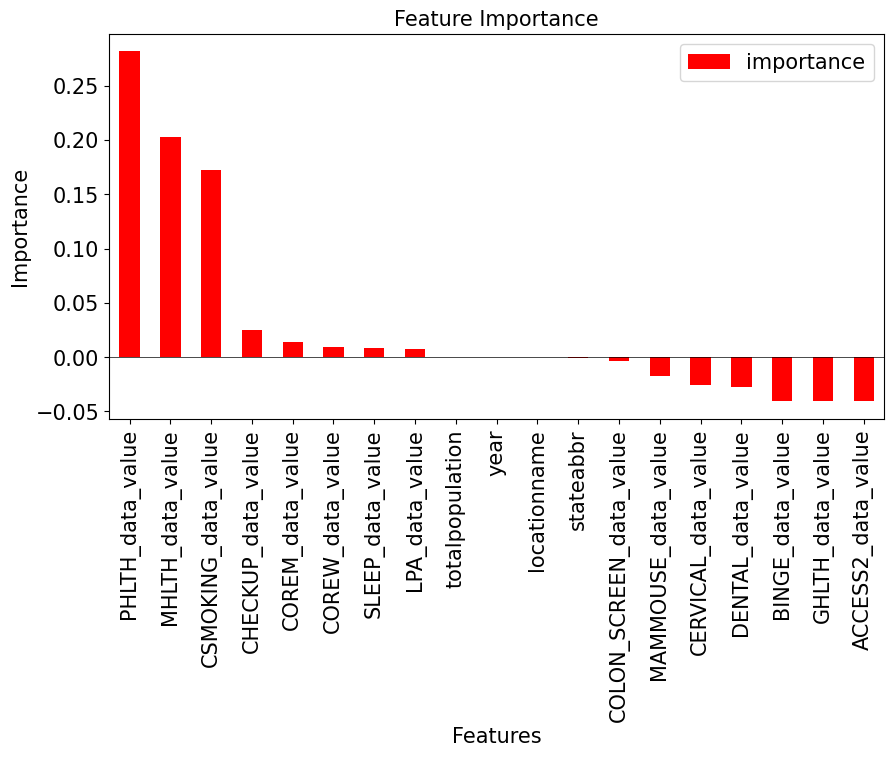

In [477]:
# Create a bargraph of the feature importance
feature_importance_df.plot(
    figsize=(10,5),
    kind='bar', 
    color='red', 
    fontsize=15)

# Give x-axis a darker line
plt.axhline(color='black', linewidth=.5)

# Add legend
plt.legend(loc='upper right', fontsize=15)

# Add title and axis names
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.show()


In [478]:
# Add features with importance less than or equal to 0 to a list
features_to_drop = []

# For loop to add features with importance less than or equal to 0 to a list
for index, row in feature_importance_df.iterrows():
    if row['importance'] <= 0:
        features_to_drop.append(index)

# View the list of features to drop
features_to_drop

['year',
 'locationname',
 'stateabbr',
 'COLON_SCREEN_data_value',
 'MAMMOUSE_data_value',
 'CERVICAL_data_value',
 'DENTAL_data_value',
 'BINGE_data_value',
 'GHLTH_data_value',
 'ACCESS2_data_value']

In [479]:
# Drop features with importance less than or equal to 0 from ml_df_encoded
ml_df_encoded = ml_df_encoded.drop(columns=features_to_drop, axis=1)

# View ml_df_encoded
ml_df_encoded.head(3)

,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,COREW_data_value,PHLTH_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,CHECKUP_data_value
0,8.4,2275,28.2,16.0,26.7,11.6,38.4,33.1,22.6,67.9
1,5.7,30863,20.4,13.3,32.3,8.4,50.0,31.9,17.6,64.0
2,6.8,4425,24.6,14.1,28.8,9.7,41.4,32.3,19.9,62.4


In [480]:
# Set X and y values for machine learning
X = ml_df_encoded.drop(columns=['COPD_data_value'], axis=1)
y = ml_df_encoded['COPD_data_value']

# Split the data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Create a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the results
y_pred = regressor.predict(X_test)

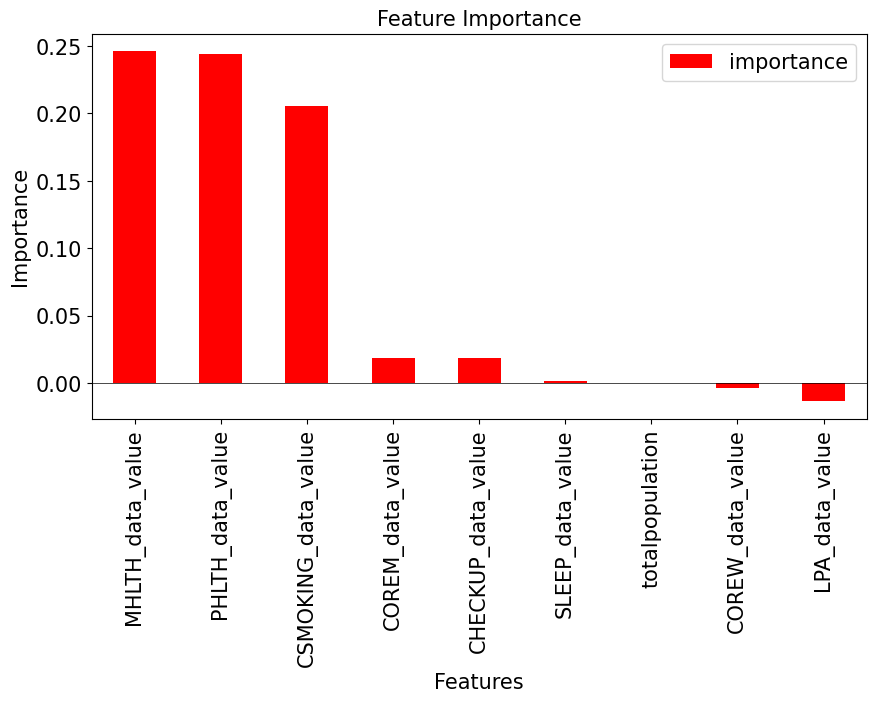

In [481]:
# Get the feature importance
feature_importance = regressor.coef_

# Create a dataframe of the feature importance
feature_importance_df = pd.DataFrame(feature_importance, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Create a bargraph of the feature importance
feature_importance_df.plot(
    figsize=(10,5),
    kind='bar', 
    color='red', 
    fontsize=15)

# Give x-axis a darker line
plt.axhline(color='black', linewidth=.5)

# Add legend
plt.legend(loc='upper right', fontsize=15)

# Add title and axis names
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.show()


In [494]:
# Evaluate the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate the model
print('r2 score: ', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.3971228002805095
r2 score:  0.9431357102796543


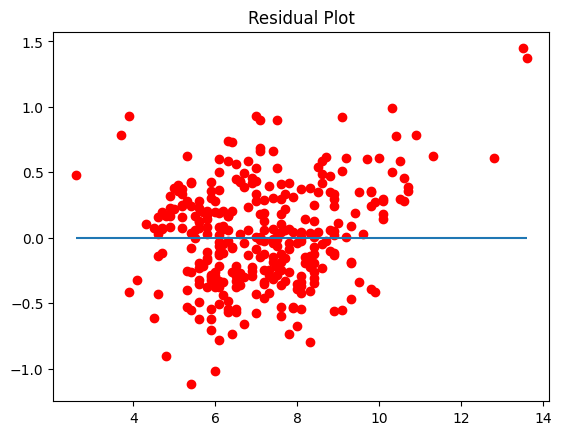

<Figure size 640x480 with 0 Axes>

In [482]:
# Plot residuals
plt.scatter(y_test, y_test - y_pred, c="red", label="Testing Data")
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Export the plot as a png
plt.savefig('./Images/residual_plot.png')


In [483]:
# Create a dataframe of the actual and predicted values
actual_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# View the dataframe ordered by index in ascending order
actual_predicted_df.sort_index(ascending=True)

,Actual,Predicted
1,5.7,5.504212
10,6.1,5.500097
22,6.8,6.214123
23,6.4,6.660828
30,5.3,5.701097
...,...,...
3116,7.3,6.906869
3120,8.8,8.329371
3127,8.6,8.016815
3130,5.6,5.317236


In [484]:
# Merge actual_predicted_df with copd_df_copy on index
merged_df = pd.merge(actual_predicted_df, ml_df, left_index=True, right_index=True)

# View the merged dataframe
merged_df.head(3)

,Actual,Predicted,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,COLON_SCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value
2997,8.4,8.658487,2020,AR,Drew,8.4,17977,34.6,17.4,52.4,14.3,35.5,80.8,13.4,67.8,40.2,36.9,22.7,71.9,16.0,21.0,77.5
423,5.6,5.955038,2020,TX,Medina,5.6,52358,26.9,14.9,53.2,19.1,34.1,79.2,10.7,62.7,38.9,33.3,16.1,70.6,33.6,17.6,69.4
644,9.5,9.151721,2020,TN,DeKalb,9.5,20837,27.7,18.2,51.8,14.6,34.9,80.2,12.5,69.5,40.0,35.2,25.2,69.8,20.2,18.6,73.0


In [485]:
# View rows where Actual does not equal COPD_data_value
merged_df.loc[merged_df['Actual'] != merged_df['COPD_data_value']]

,Actual,Predicted,year,stateabbr,locationname,COPD_data_value,totalpopulation,LPA_data_value,MHLTH_data_value,DENTAL_data_value,BINGE_data_value,COREW_data_value,CERVICAL_data_value,PHLTH_data_value,COLON_SCREEN_data_value,COREM_data_value,SLEEP_data_value,CSMOKING_data_value,MAMMOUSE_data_value,ACCESS2_data_value,GHLTH_data_value,CHECKUP_data_value


In [486]:
# Drop everything after 7th column
merged_df = merged_df.iloc[:, :7]

# View the dataframe
merged_df.head(3)

,Actual,Predicted,year,stateabbr,locationname,COPD_data_value,totalpopulation
2997,8.4,8.658487,2020,AR,Drew,8.4,17977
423,5.6,5.955038,2020,TX,Medina,5.6,52358
644,9.5,9.151721,2020,TN,DeKalb,9.5,20837


In [487]:
# Merge merged_df with copd_df_copy on year, stateabbr, locationname, totalpopulation, and COPD_data_value
merged_df = pd.merge(merged_df, COPD_df_copy, on=['year', 'stateabbr', 'locationname', 'totalpopulation', 'COPD_data_value'])

# View the dataframe
merged_df.head(3)

,Actual,Predicted,year,stateabbr,locationname,COPD_data_value,totalpopulation,statedesc,datasource,category,measure,data_value_unit,data_value_type,low_confidence_limit,high_confidence_limit,locationid,categoryid,measureid,datavaluetypeid,short_question_text,geolocation,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8
0,8.4,8.658487,2020,AR,Drew,8.4,17977,Arkansas,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,7.4,9.5,05043,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-91.7227781,...",15,15
1,5.6,5.955038,2020,TX,Medina,5.6,52358,Texas,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,4.9,6.2,48325,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-99.1110845,...",23,777
2,9.5,9.151721,2020,TN,DeKalb,9.5,20837,Tennessee,BRFSS,Health Outcomes,Chronic obstructive pulmonary disease among ad...,%,Age-adjusted prevalence,8.1,10.8,47041,HLTHOUT,COPD,AgeAdjPrv,COPD,"{'type': 'Point', 'coordinates': [-85.8335959,...",39,2006


In [488]:
# Determine the standard deviation of the COPD_data_value column
COPD_df_copy['COPD_data_value'].std()

1.7476714066947174

In [489]:
# Create a row that answers True if the predicted value lies between the high and low confidence_limit values
merged_df['within_confidence_limit'] = np.where(
    (merged_df['Predicted'] >= merged_df['low_confidence_limit']) & 
    (merged_df['Predicted'] <= merged_df['high_confidence_limit']), True, False)

In [490]:
# Count number of True values and False values
merged_df['within_confidence_limit'].value_counts()

True     306
False      9
Name: within_confidence_limit, dtype: int64

In [491]:
# Calculate the percentage of predicted values within the confidence limit
merged_df['within_confidence_limit'].value_counts(normalize=True)*100

True     97.142857
False     2.857143
Name: within_confidence_limit, dtype: float64

In [492]:
# Create a column that answers true if the predicted value is within 1 standard deviation of the actual value
merged_df['Within 1 Standard Deviation'] = np.where(
    (merged_df['Actual'] >= merged_df['Predicted'] - COPD_df_copy['COPD_data_value'].std()) & 
    (merged_df['Actual'] <= merged_df['Predicted'] + COPD_df_copy['COPD_data_value'].std()), True, False)

# Count the number of true values in the Within 1 Standard Deviation column
merged_df['Within 1 Standard Deviation'].value_counts()

True    315
Name: Within 1 Standard Deviation, dtype: int64

In [493]:
# Use an f string to print the standard deviation of the actual data rounded to 2 decimal places
print(f"The standard deviation of the actual data is {round(COPD_df_copy['COPD_data_value'].std(), 2)}.")

# Use an f string to print the percentage of predicted values within one standard deviation rounded to 2 decimal places
print(f"The percentage of predicted values within one standard deviation is {round(merged_df['Within 1 Standard Deviation'].value_counts(normalize=True)*100, 2)}%.")

The standard deviation of the actual data is 1.75.
The percentage of predicted values within one standard deviation is True    100.0
Name: Within 1 Standard Deviation, dtype: float64%.
